In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Missing values

In [115]:
dfm = df.copy().drop('Id', axis=1)

In [116]:
null_col = dfm.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

### 1.1 Garage Variables

In [117]:
def fill_na_garage(df=dfm):
    df['GarageCond'] = df['GarageCond'].fillna('na')
    df['GarageQual'] = df['GarageCond'].fillna('na')
    df['GarageType'] = df['GarageType'].fillna('na')
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(dfm['YearBuilt'])
    df['GarageFinish'] = df['GarageFinish'].fillna('na')

### 1.2 Basement variables

In [118]:
def fill_na_basement(df=dfm):
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('na')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('na')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('na')
    df['BsmtCond'] = df['BsmtCond'].fillna('na')
    df['BsmtQual'] = df['BsmtQual'].fillna('na')

### 1.3 Masonry veneer type

In [119]:
def fill_na_masvnr(df=dfm):
    df['MasVnrType'] = df['MasVnrType'].fillna('na')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

### 1.4 Fireplace variables

In [120]:
def fill_na_fireplace(df=dfm):
    df['FireplaceQu'] = df['FireplaceQu'].fillna('na')

### 1.5 Electrical

<Axes: >

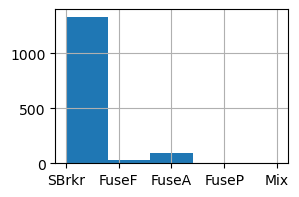

In [121]:
plt.figure(figsize=(3,2))
dfm['Electrical'].hist(bins= 5)

In [122]:
def fill_na_electrical(df=dfm):
    df['Electrical'] = df['Electrical'].fillna('SBrkr')

### 1.6 Fill NA

In [123]:
def fill_na(df=dfm):
    fill_na_basement(df)
    fill_na_electrical(df)
    fill_na_fireplace(df)
    fill_na_garage(df)
    fill_na_masvnr(df)
    
fill_na()

### 1.6 Dropping cols with too many NA

In [124]:
null_col = dfm.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
LotFrontage     259
dtype: int64

In [125]:
too_many_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'LotFrontage']
dfm = dfm.drop(too_many_na, axis=1)
dfm.shape

(1460, 75)

## 2. Outliers

In [126]:
from scipy import stats

def plot_outliers(norm, outl, attribute):
    max_nor = norm.max(); max_out = outl.max()
    max_val = max(max_nor, max_out)
    min_nor = norm.min(); min_out = outl.min()
    min_val = min(min_nor, min_out)

    bins_norm = max(round((max_nor - min_nor) / (max_val - min_val) * 100), 1)

    if not outl.empty:
        bins_outl = max(round((max_out - min_out) / (max_val - min_val) * 100), 1)

    plt.figure(figsize=(8,5))
    plt.title('Outliers - ' + attribute)
    plt.hist(norm, bins=bins_norm)
    if not outl.empty:
        plt.hist(outl, bins=bins_outl)
    plt.show()

def find_and_plot_outliers (attribute, z_thresh=3, dataframe=dfm):
    z_score = np.abs(stats.zscore(dataframe[attribute]))
    outliers = np.where(z_score > z_thresh)[0]

    norm_values = dataframe.drop(outliers)
    outl_values = dataframe.take(outliers)

    plot_outliers(norm_values[attribute], outl_values[attribute], attribute)

    return outliers


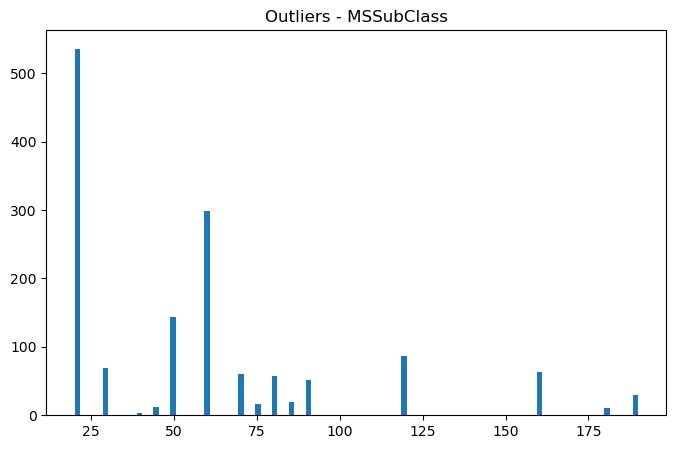

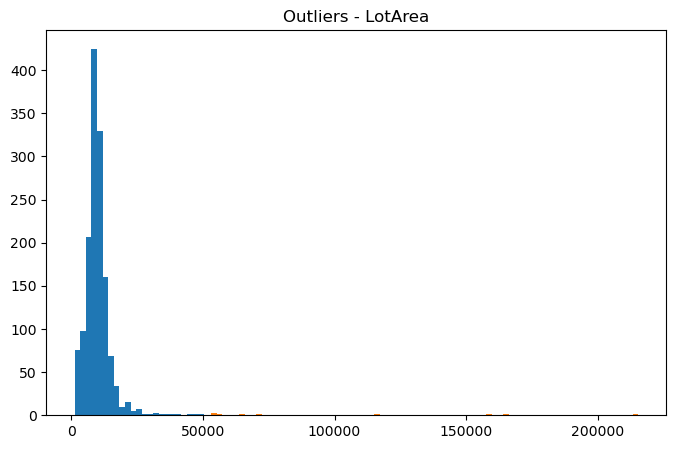

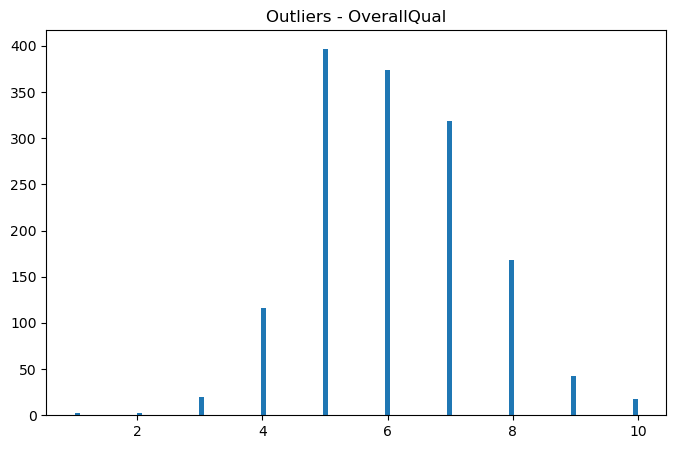

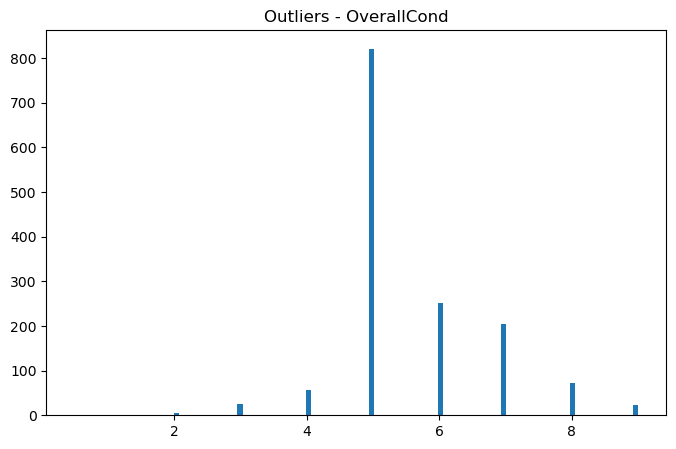

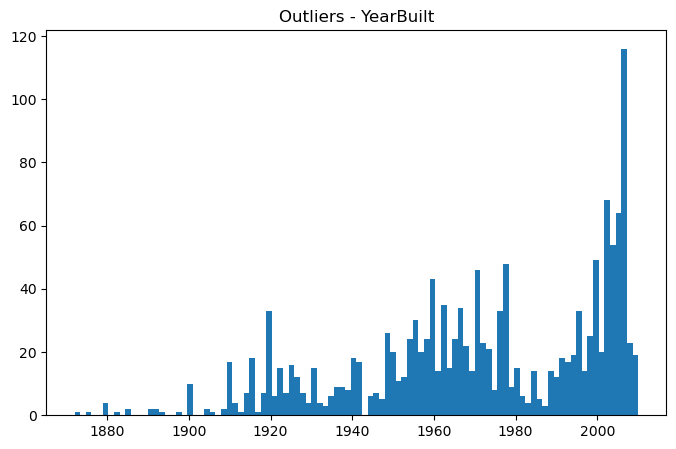

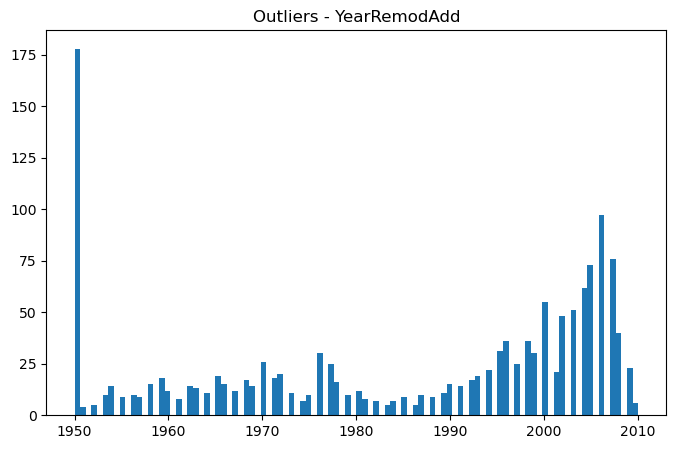

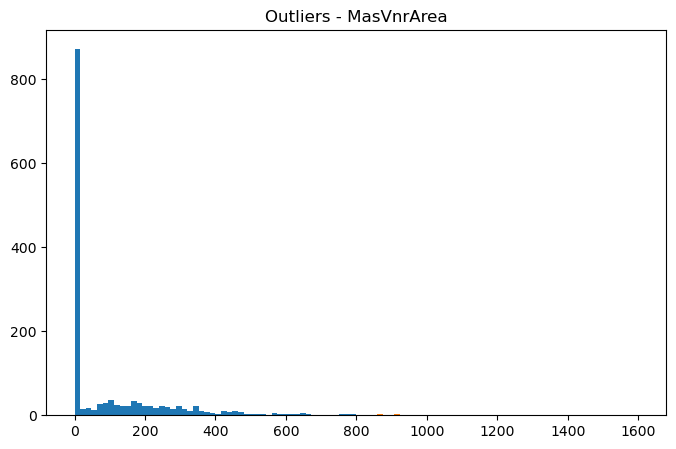

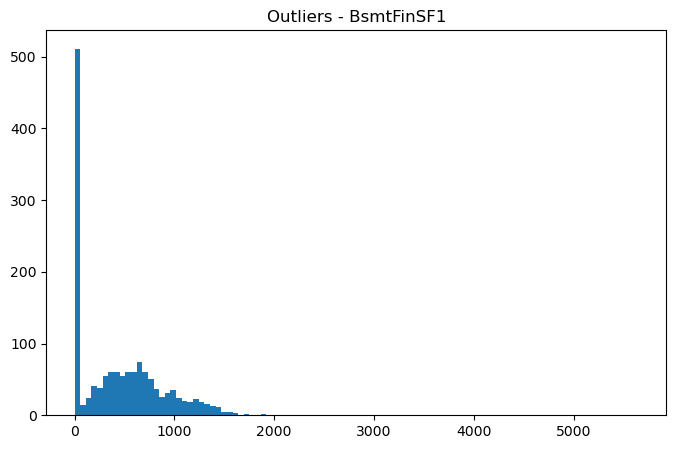

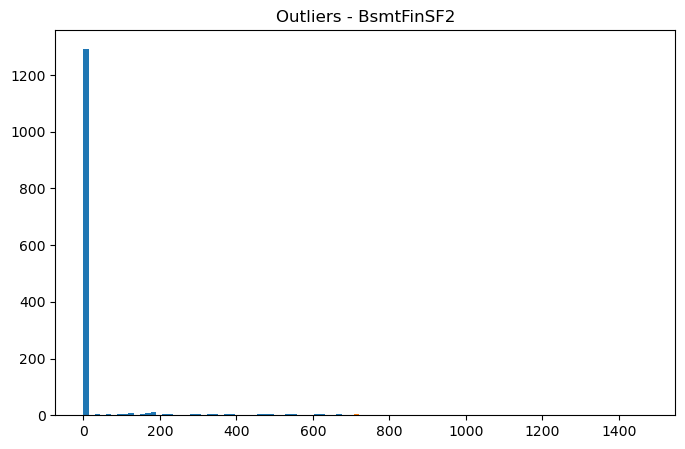

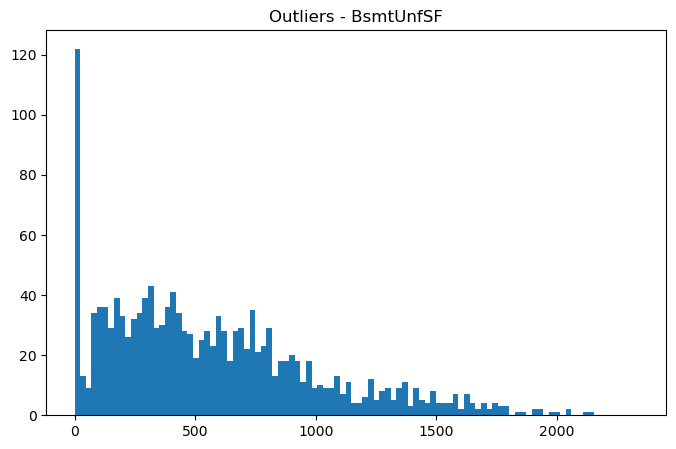

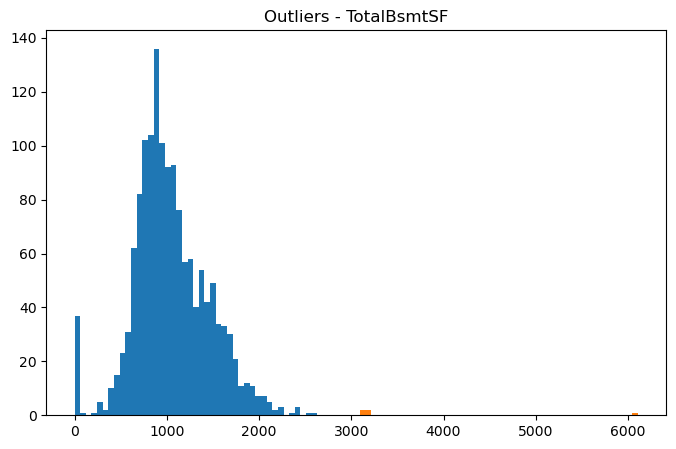

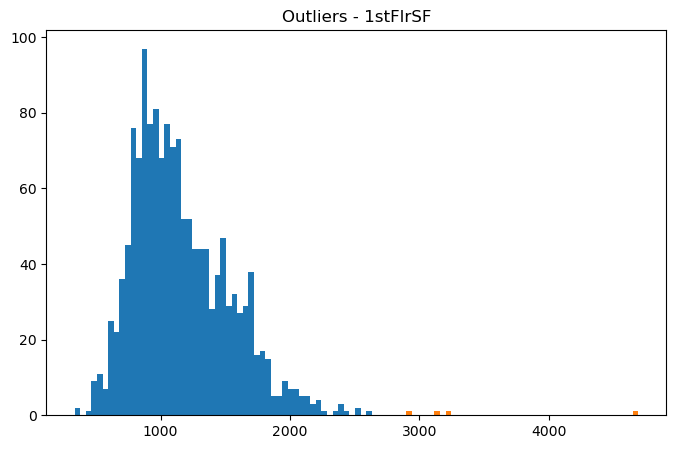

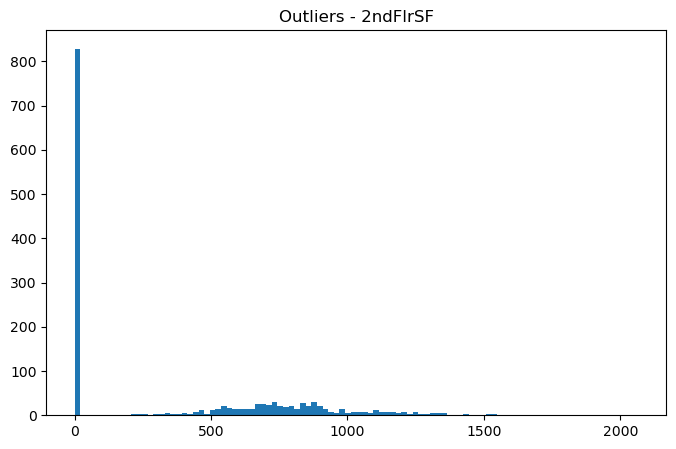

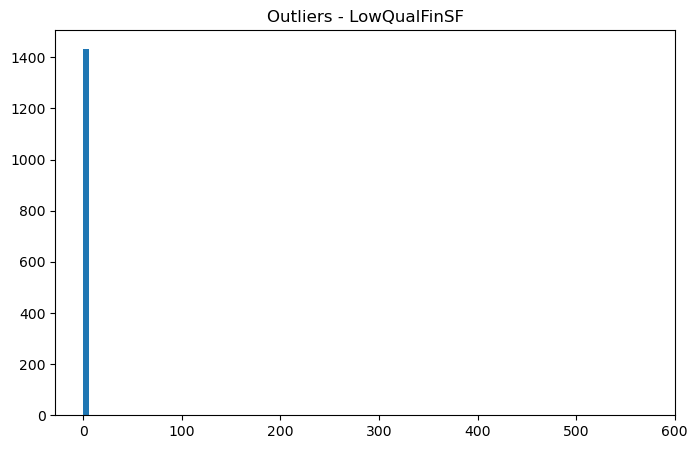

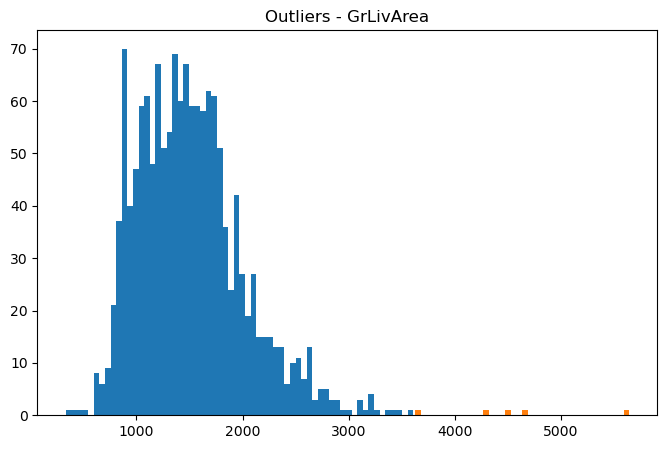

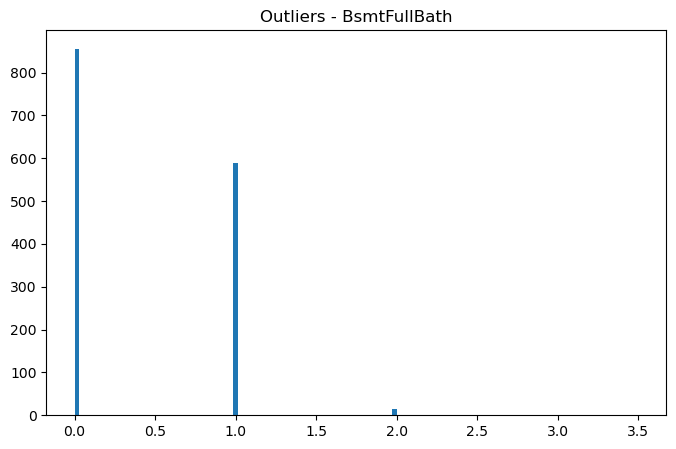

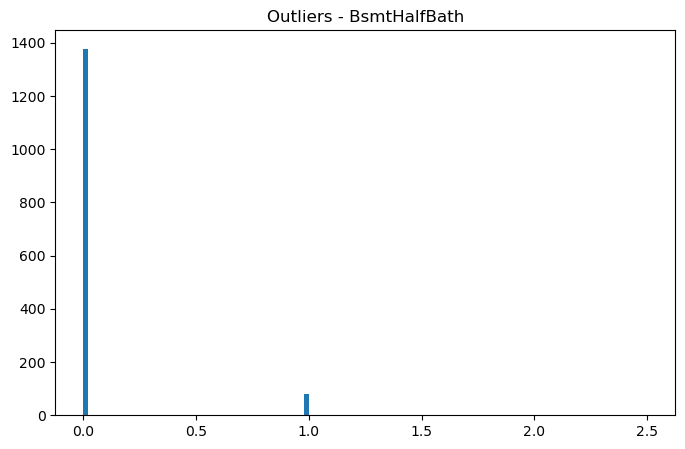

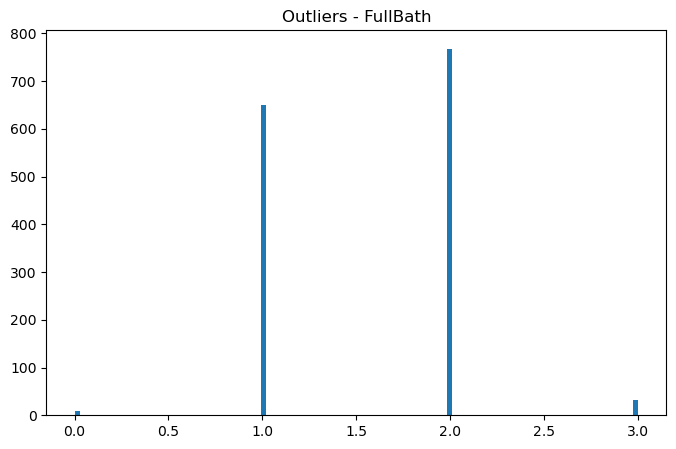

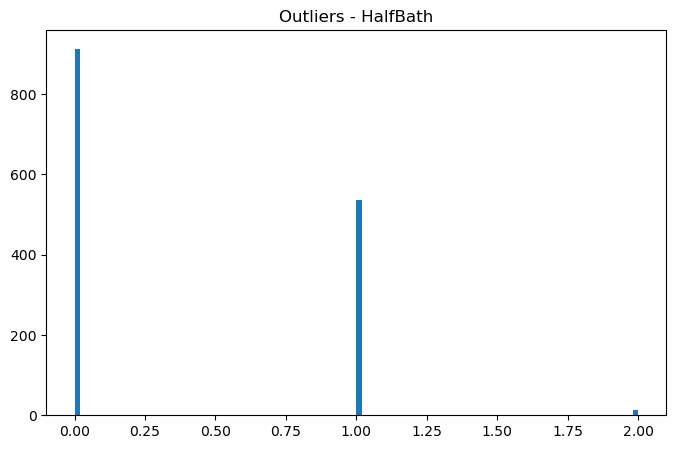

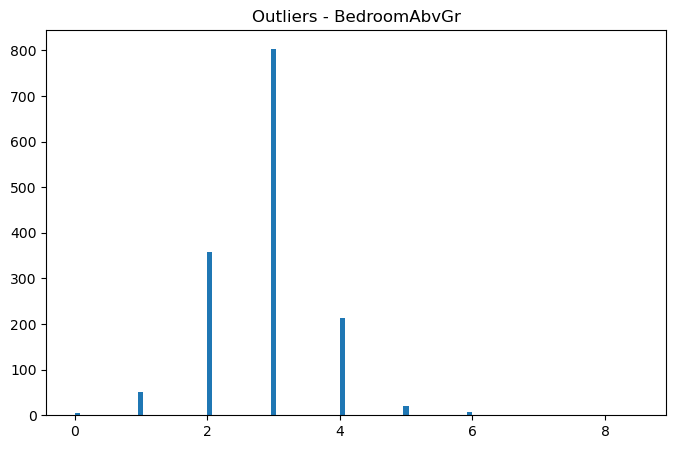

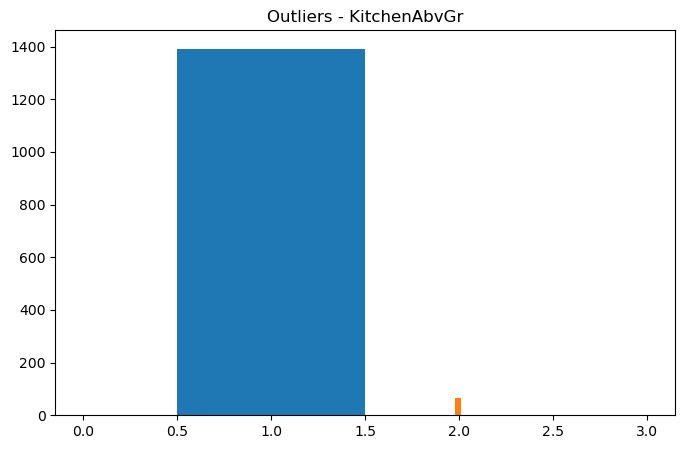

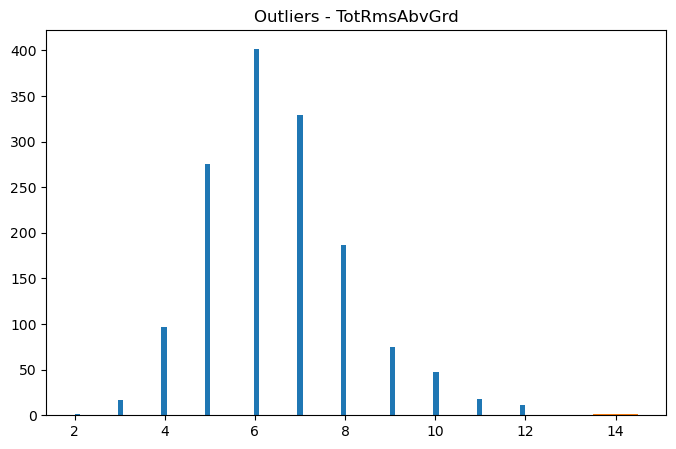

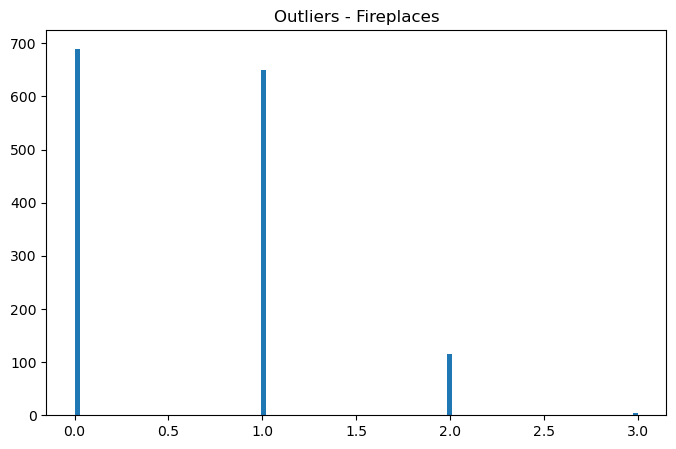

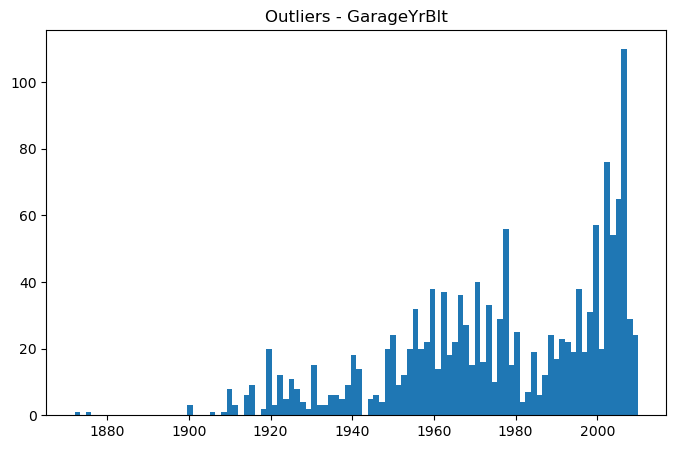

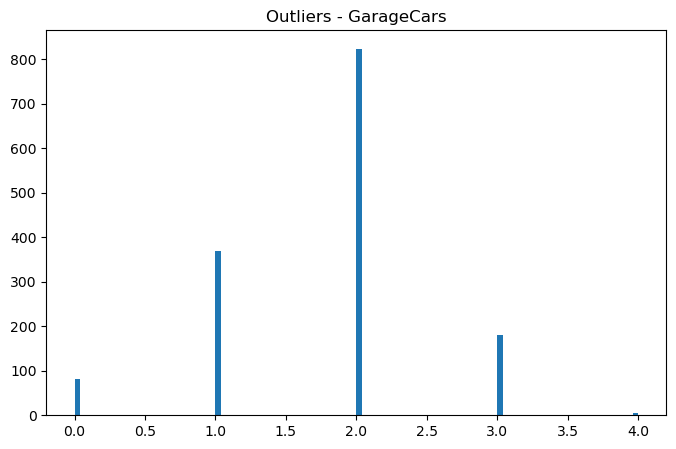

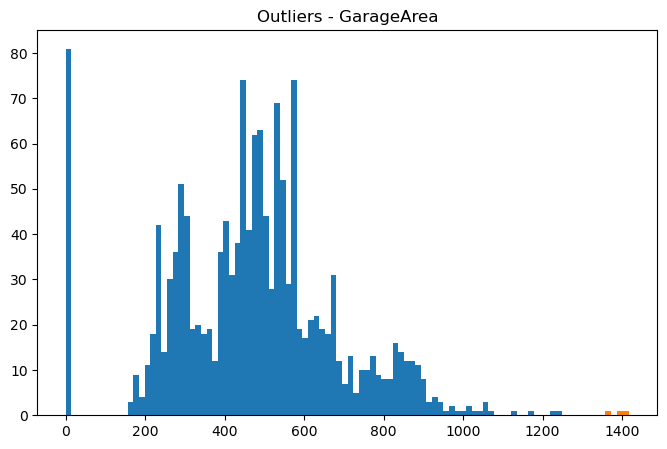

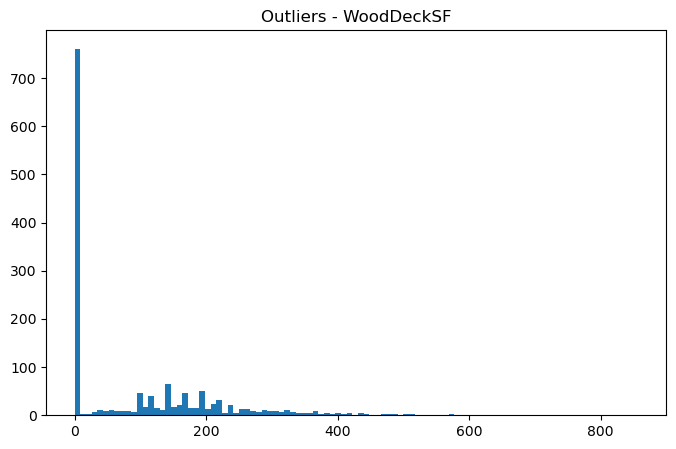

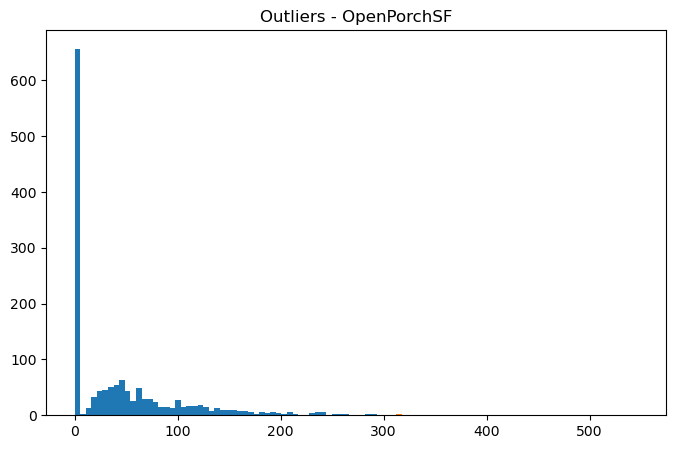

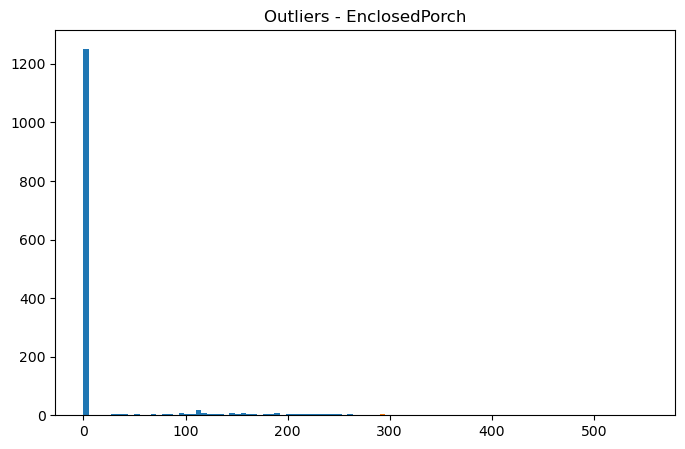

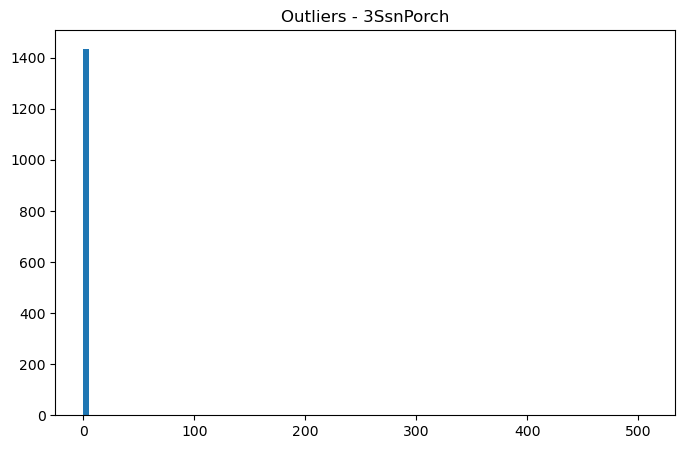

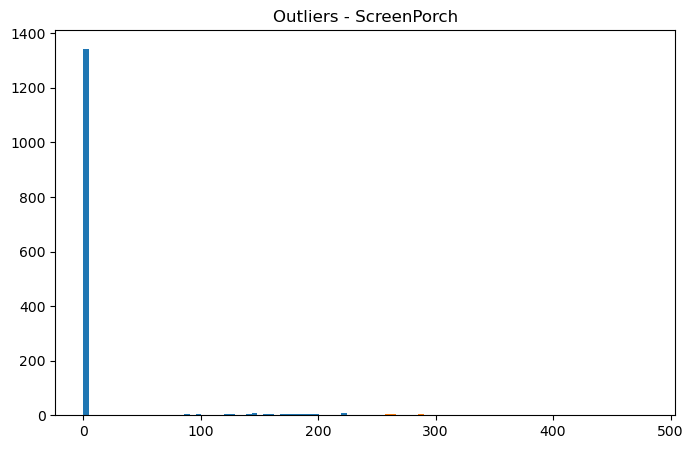

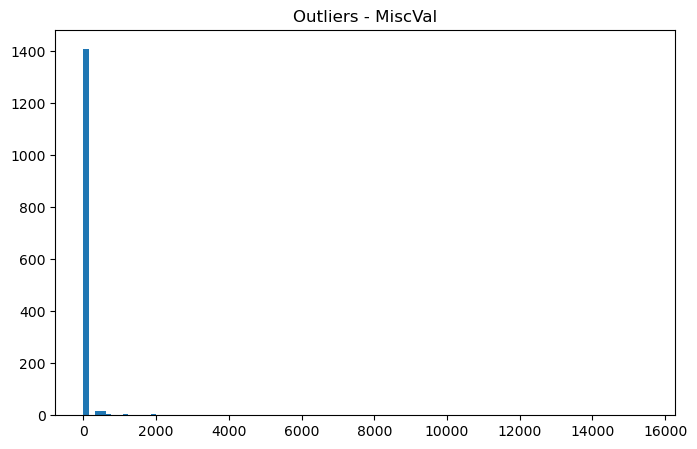

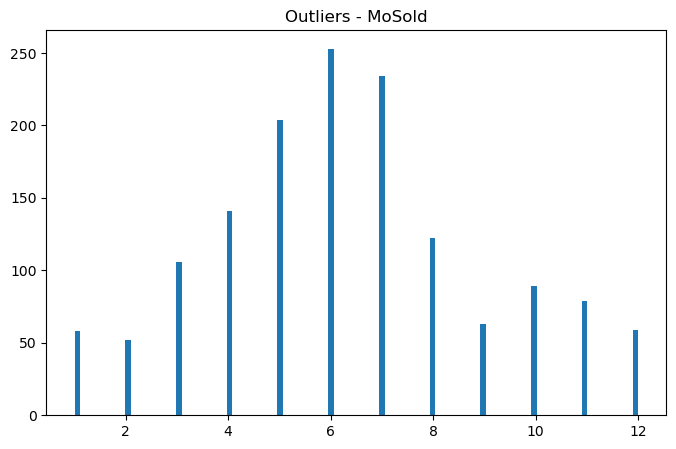

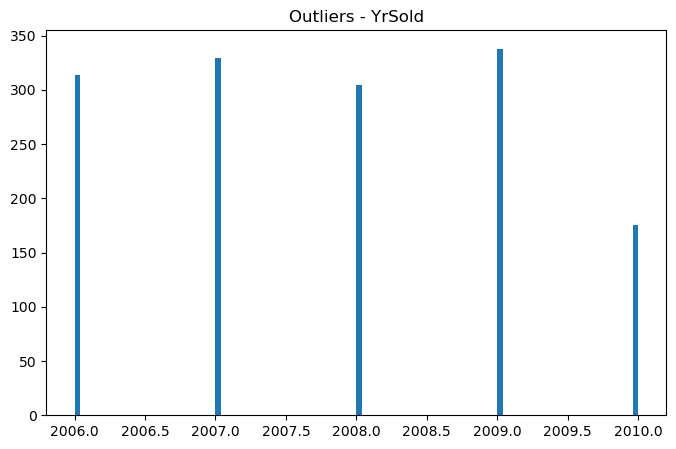

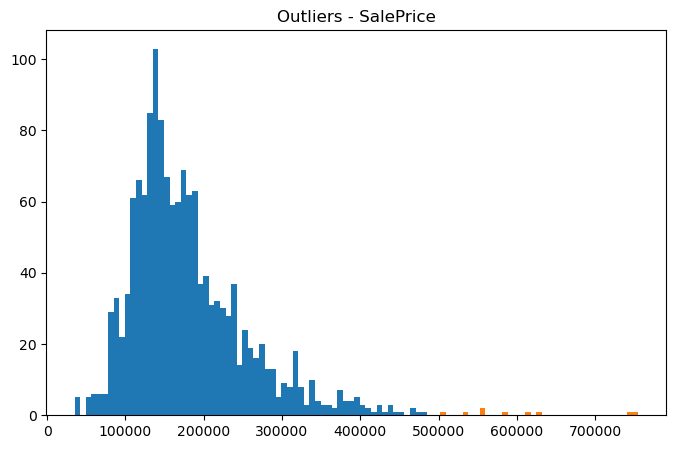

In [127]:
outliers = {}
numerical = dfm.select_dtypes(include='number').columns.values
numerical = np.delete(numerical, np.where(numerical == 'PoolArea'))

for attribute in numerical:
    outliers[attribute] = find_and_plot_outliers(attribute, z_thresh=4, dataframe=dfm)

In [128]:
found_outliers = set()

outliers['KitchenAbvGr'] = []

for attribute in numerical:
    for value in outliers[attribute]:
        found_outliers.add(int(value))

print('number of outliers: ' + str(len(found_outliers)))
print(found_outliers)

number of outliers: 150
{1024, 3, 517, 5, 1031, 523, 1046, 542, 546, 1068, 51, 52, 1077, 53, 55, 1080, 58, 581, 70, 583, 72, 80, 597, 88, 618, 113, 625, 115, 630, 120, 635, 125, 1152, 129, 1154, 645, 647, 1161, 1169, 1171, 1173, 153, 666, 1181, 1182, 159, 1184, 166, 1190, 170, 1197, 178, 691, 182, 185, 1210, 187, 704, 705, 706, 196, 197, 198, 205, 1230, 726, 729, 735, 224, 738, 1253, 744, 233, 747, 237, 755, 249, 764, 769, 258, 1282, 263, 267, 1293, 271, 1298, 1299, 280, 798, 1313, 289, 803, 807, 808, 297, 813, 1326, 1328, 312, 313, 828, 322, 1346, 1349, 328, 332, 335, 1360, 854, 1369, 346, 349, 358, 359, 873, 1386, 875, 883, 1396, 375, 888, 889, 887, 384, 898, 1418, 907, 406, 923, 924, 1437, 1440, 426, 939, 941, 1457, 1458, 1459, 440, 954, 446, 451, 457, 981, 470, 471, 996, 495, 496, 1009}


In [129]:
dfo = dfm.drop(found_outliers)
print(dfo.shape)

(1310, 75)


## 3. Data Transformation

In [130]:
import math

def plot_hist_matrix(attributes, num_cols=3, df=dfo):
    num_attributes = len(attributes)
    num_rows = math.ceil(num_attributes/num_cols)

    plt.figure(figsize=(5*num_cols, 4*num_rows))
    for index, attribute in enumerate(attributes):
        plt.subplot(num_rows, num_cols, index+1)
        plt.title(attribute)
        plt.hist(df[attribute], bins=30)
    plt.show()


In [131]:
categorial = list(dfo.columns.values)

for attr in numerical:
    categorial.remove(attr)

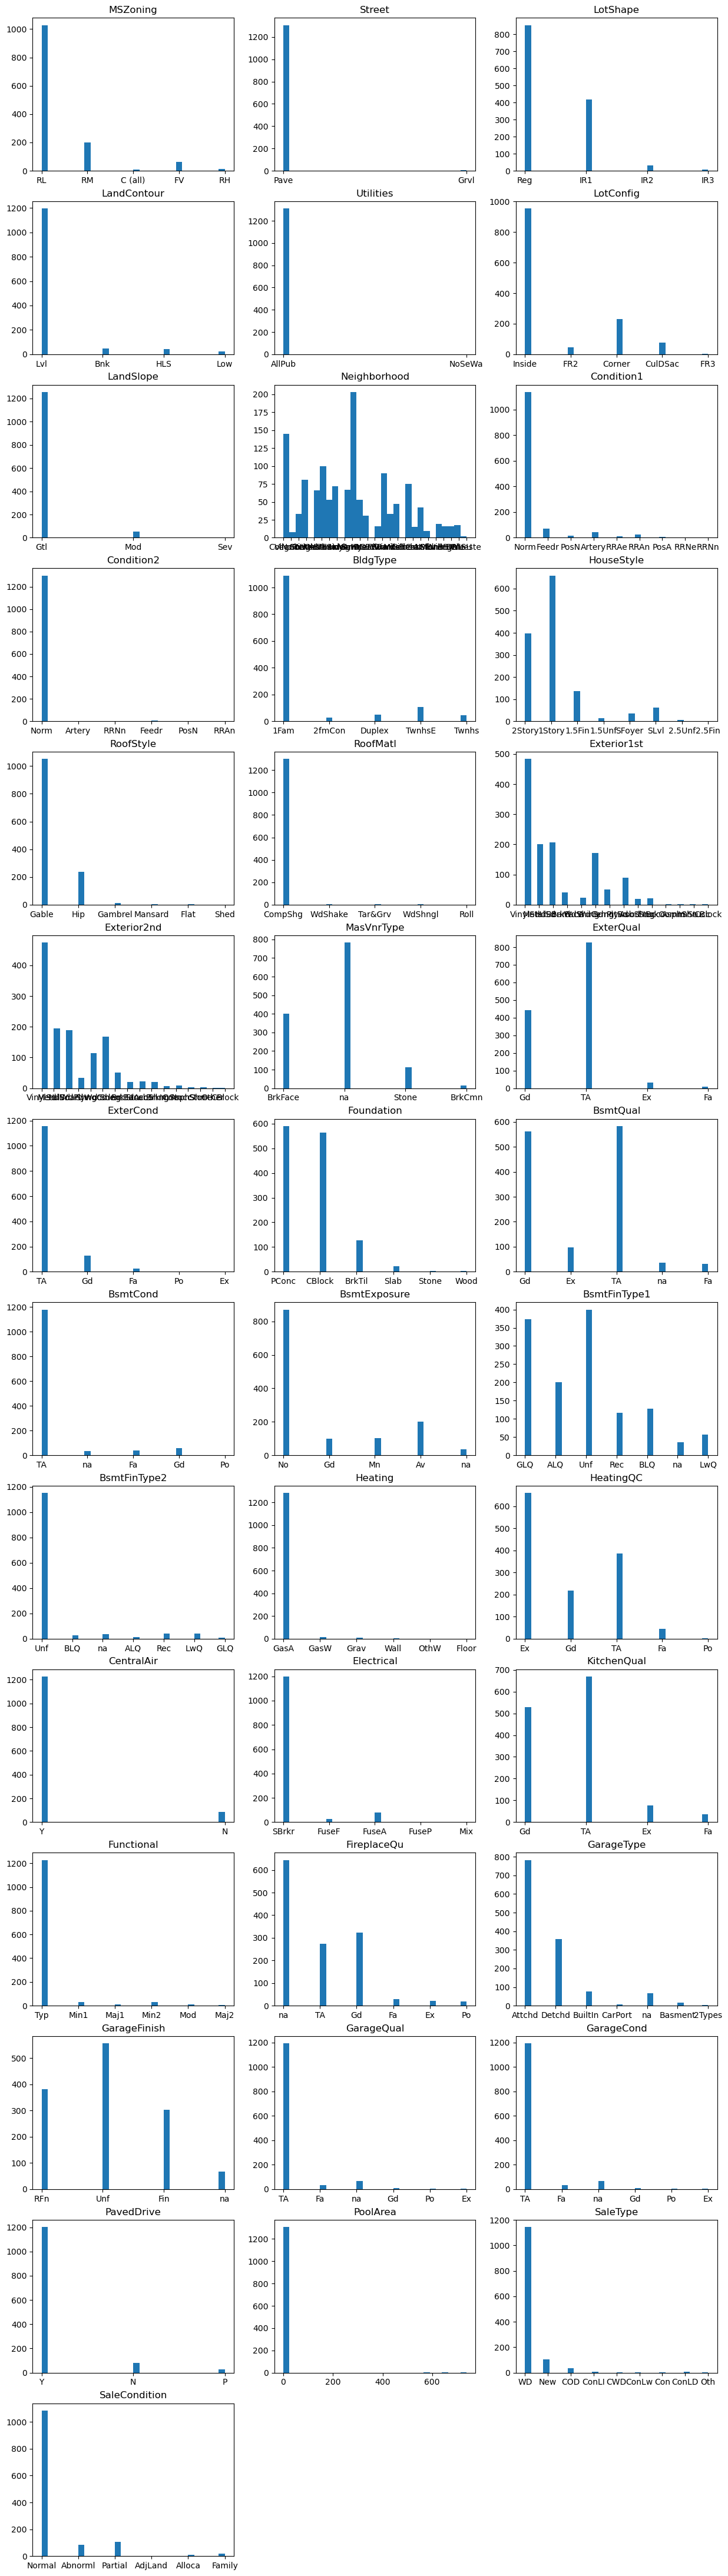

In [132]:
plot_hist_matrix(categorial, df=dfo)

In [133]:
skewed = ['Street', 'Utilities', 'LandContour', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']
dft = dfo.drop(skewed, axis=1)

for attr in skewed:
    categorial.remove(attr)

### 3.1 Quality attributes

In [134]:
def transform_quality_attributes(df=dft):
    for attr in categorial:
        if 'Qual' in attr or 'QC' in attr or 'Cond' in attr or 'Qu' in attr:
            df[attr] = df[attr].replace('na', 0)
            df[attr] = df[attr].replace('Po', 1)
            df[attr] = df[attr].replace('Fa', 2)
            df[attr] = df[attr].replace('TA', 3)
            df[attr] = df[attr].replace('Gd', 4)
            df[attr] = df[attr].replace('Ex', 5)

### 3.2 CentralAir

In [135]:
def transform_central_air(df=dft):
    df['CentralAir'] = df['CentralAir'].replace('N', 0)
    df['CentralAir'] = df['CentralAir'].replace('Y', 1)

### 3.3 Lot Shape

In [136]:
def transform_lot_shape(df=dft):
    df['LotShape'] = df['LotShape'].replace('Reg', 0)
    df['LotShape'] = df['LotShape'].replace('IR1', 1)
    df['LotShape'] = df['LotShape'].replace('IR2', 2)
    df['LotShape'] = df['LotShape'].replace('IR3', 3)

### 3.4 Basement

In [137]:
def transform_basement(df=dft):
    df['BsmtExposure'] = df['BsmtExposure'].replace('na', 0)
    df['BsmtExposure'] = df['BsmtExposure'].replace('No', 1)
    df['BsmtExposure'] = df['BsmtExposure'].replace('Mn', 2)
    df['BsmtExposure'] = df['BsmtExposure'].replace('Av', 3)
    df['BsmtExposure'] = df['BsmtExposure'].replace('Gd', 4)
    
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('na', 0)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('Unf', 1)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('LwQ', 2)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('Rec', 3)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('BLQ', 4)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('ALQ', 5)
    df['BsmtFinType1'] = df['BsmtFinType1'].replace('GLQ', 6)
    
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('na', 0)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('Unf', 1)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('LwQ', 2)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('Rec', 3)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('BLQ', 4)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('ALQ', 5)
    df['BsmtFinType2'] = df['BsmtFinType2'].replace('GLQ', 6)

### 3.5 Functional and Electrical

In [138]:
def transform_functional_and_electrical(df=dft):
    df['Functional'] = df['Functional'].replace('Sal', 0)
    df['Functional'] = df['Functional'].replace('Sev', 1)
    df['Functional'] = df['Functional'].replace('Maj2', 2)
    df['Functional'] = df['Functional'].replace('Maj1', 3)
    df['Functional'] = df['Functional'].replace('Mod', 4)
    df['Functional'] = df['Functional'].replace('Min2', 5)
    df['Functional'] = df['Functional'].replace('Min1', 6)
    df['Functional'] = df['Functional'].replace('Typ', 7)
    
    df['Electrical'] = df['Electrical'].replace('FuseP', 0)
    df['Electrical'] = df['Electrical'].replace('FuseF', 1)
    df['Electrical'] = df['Electrical'].replace('FuseA', 2)
    df['Electrical'] = df['Electrical'].replace('Mix', 3)
    df['Electrical'] = df['Electrical'].replace('SBrkr', 4)

### 3.6 Garage

In [139]:
def transform_garage(df=dft):
    df['GarageFinish'] = df['GarageFinish'].replace('na', 0)
    df['GarageFinish'] = df['GarageFinish'].replace('Unf', 1)
    df['GarageFinish'] = df['GarageFinish'].replace('RFn', 2)
    df['GarageFinish'] = df['GarageFinish'].replace('Fin', 3)

### 3.7 Paved Drive

In [140]:
def transform_paved_drive(df=dft):
    df['PavedDrive'] = df['PavedDrive'].replace('N', 0)
    df['PavedDrive'] = df['PavedDrive'].replace('P', 1)
    df['PavedDrive'] = df['PavedDrive'].replace('Y', 2)

### 3.8 Other categorical

In [141]:

label_transf = {}

def compute_label_corr(attribute, df=dft):
    label_transf[attribute] = {}

    labels = df[attribute].unique()
    for label in labels:
        label_transf[attribute][label] = df['SalePrice'][df[attribute] == label].mean()
        
def transform_label(attribute, df=dft):
    labels = df[attribute].unique()
    for label in labels:
        df[attribute] = df[attribute].replace(label, label_transf[attribute][label])

In [142]:
otherCategorical = ['MSZoning', 'HouseStyle', 'Neighborhood', 'LotConfig', 'Condition1', 'BldgType', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition']

def transform_other_categorical(df=dft, skip_label_comp=False):
    for attr in otherCategorical:
        if(not skip_label_comp):
            compute_label_corr(attr, df)
        transform_label(attr, df)

### 3.9 Transformation

In [143]:
def transform(df=dft, skip_label_comp=False):
    transform_quality_attributes(df)
    transform_central_air(df)
    transform_lot_shape(df)
    transform_basement(df)
    transform_functional_and_electrical(df)
    transform_garage(df)
    transform_paved_drive(df)
    transform_other_categorical(df, skip_label_comp)

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3260016334.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attr] = df[attr].replace('Ex', 5)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3260016334.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attr] = df[attr].replace('Gd', 4)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3125552929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

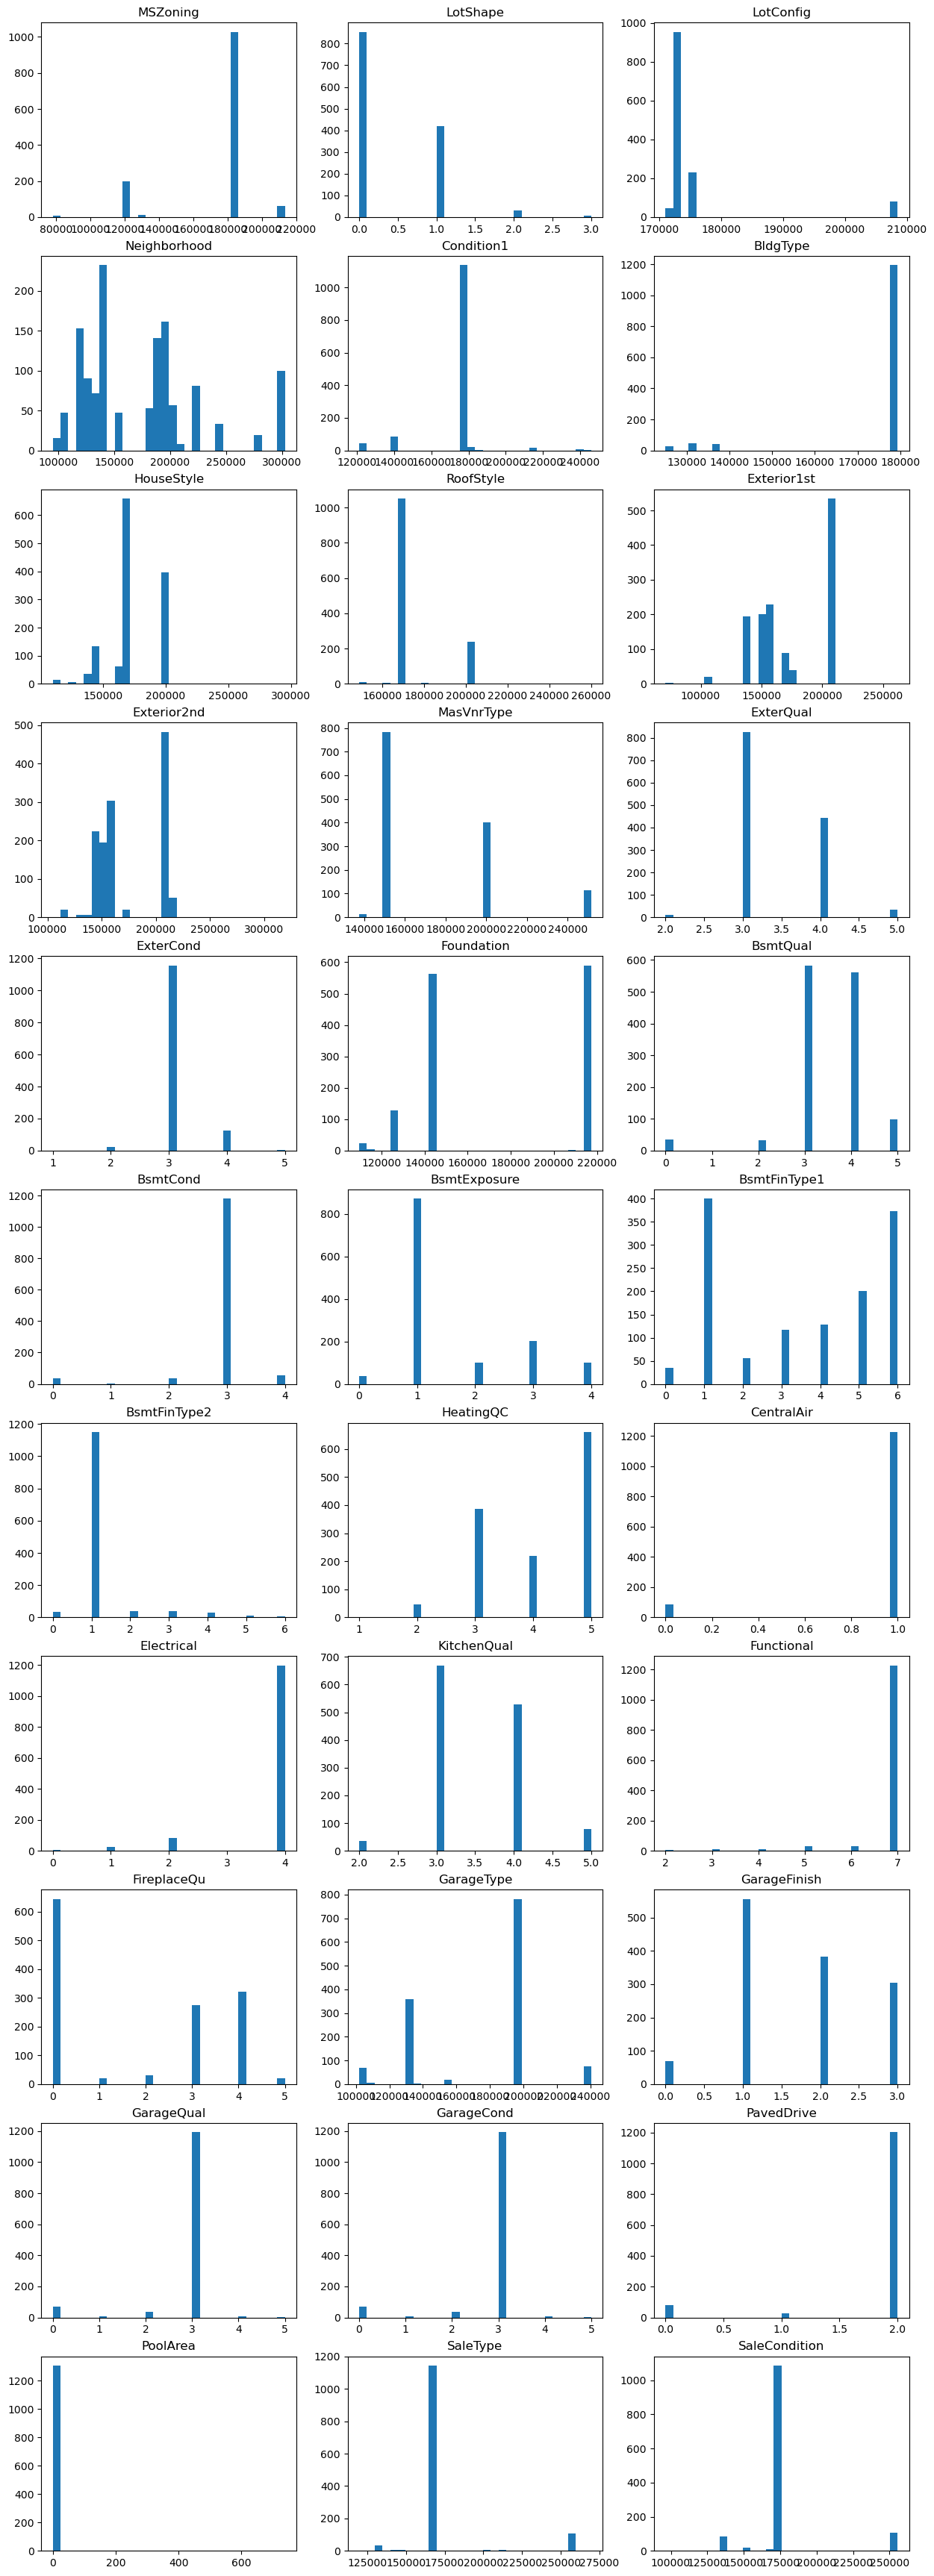

In [144]:
transform()

plot_hist_matrix(categorial, df=dft)

## 4. Normalization

In [145]:
norm_values = { 'mean' : {}, 'std' : {}}

dff = dft.drop('PoolArea', axis=1)

def compute_means_and_stds(df, columns=dff.columns):
    for col in columns:
        norm_values['mean'][col] = df[col].mean()
        norm_values['std'][col] = df[col].std()

compute_means_and_stds(dff)

In [146]:
def normalize(df=dff, columns=dff.columns):
    for col in columns:
        df[col] = (df[col] - norm_values['mean'][col]) / norm_values['std'][col]

normalize(dff)
dff.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.071562,0.370295,-0.264868,-0.678432,-0.301189,0.435239,0.227107,0.312313,1.232693,0.707029,...,0.298465,-0.364226,-0.033312,-0.253081,-0.144348,-1.606014,0.137217,-0.243548,-0.16588,0.479517
1,-0.870615,0.370295,0.008674,-0.678432,-0.497470,0.651974,-2.322601,0.312313,-0.190100,-0.038110,...,-0.749164,-0.364226,-0.033312,-0.253081,-0.144348,-0.495788,-0.618051,-0.243548,-0.16588,0.091359
2,0.071562,0.370295,0.401148,1.091978,-0.301189,0.435239,0.227107,0.312313,1.232693,0.707029,...,-0.027846,-0.364226,-0.033312,-0.253081,-0.144348,0.984513,0.137217,-0.243548,-0.16588,0.695160
4,0.071562,0.370295,1.117115,1.091978,-0.497470,2.401165,0.227107,0.312313,1.232693,1.452168,...,0.693472,-0.364226,-0.033312,-0.253081,-0.144348,2.094739,0.137217,-0.243548,-0.16588,1.076129
6,-0.870615,0.370295,0.123800,-0.678432,-0.301189,0.930463,0.227107,0.312313,-0.190100,1.452168,...,0.229768,-0.364226,-0.033312,-0.253081,-0.144348,0.614438,-0.618051,-0.243548,-0.16588,1.895573


## 6. Prepare test data

In [147]:
test_df_raw = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

test_df = test_df_raw.drop(['Id', 'PoolArea'], axis=1)
test_df = test_df.drop(too_many_na, axis=1)
test_df = test_df.drop(skewed, axis=1)

test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(0)
test_df['GarageArea'] = test_df['GarageArea'].fillna(0)
# test_df['PoolArea'] = test_df['PoolArea'].fillna(0)
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(0)
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(0)
test_df['Functional'] = test_df['Functional'].fillna('Typ')
test_df['Exterior1st'] = test_df['Exterior1st'].fillna('VinylSd')
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna('VinylSd')
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(0)
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(0)
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(0)
test_df['KitchenQual'] = test_df['KitchenQual'].fillna('TA')
test_df['GarageCars'] = test_df['GarageCars'].fillna(0)
test_df['SaleType'] = test_df['SaleType'].fillna('WD')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('na')

fill_na(test_df)
transform(test_df, skip_label_comp=True)
normalize(test_df, test_df.columns)

test_df.head()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3260016334.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attr] = df[attr].replace('Ex', 5)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3260016334.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attr] = df[attr].replace('Gd', 4)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_80591/3125552929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.870615,-1.745865,0.489633,-0.678432,-0.301189,-0.599170,-2.322601,0.312313,-0.190100,-0.783249,...,0.415830,-0.749164,-0.364226,-0.033312,2.725899,-0.144348,-0.125713,1.647753,-0.243548,-0.16588
1,-0.870615,0.370295,1.118780,1.091978,-0.017453,-0.599170,0.227107,0.312313,-0.190100,-0.038110,...,2.571841,-0.130891,-0.364226,-0.033312,-0.253081,90.963525,-0.125713,1.647753,-0.243548,-0.16588
2,0.071562,0.370295,1.014834,1.091978,-0.301189,0.302025,0.227107,0.312313,1.232693,-0.783249,...,1.029398,-0.165240,-0.364226,-0.033312,-0.253081,-0.144348,-1.235938,1.647753,-0.243548,-0.16588
3,0.071562,0.370295,0.098587,1.091978,-0.301189,0.302025,0.227107,0.312313,1.232693,-0.038110,...,2.290622,-0.130891,-0.364226,-0.033312,-0.253081,-0.144348,-0.125713,1.647753,-0.243548,-0.16588
4,1.484829,0.370295,-1.084305,1.091978,-0.301189,1.994270,0.227107,0.289881,-0.190100,1.452168,...,-0.777219,0.659124,-0.364226,-0.033312,3.321695,-0.144348,-1.976089,1.647753,-0.243548,-0.16588


In [148]:
null_col = test_df.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 9. Output datasets

In [149]:
# fin_dff = dff.drop(skewed, axis=1)

dff.to_csv('house-prices-advanced-regression-techniques/preprocessed.csv', index=False)

In [150]:
test_df.to_csv('house-prices-advanced-regression-techniques/preprocessed_test.csv', index=False)

import json
with open('house-prices-advanced-regression-techniques/normalization_values.json', 'w', encoding='utf-8') as f:
    json.dump(norm_values, f, ensure_ascii=False, indent=2)